In [6]:
import numpy as np
import holoviews as hv
hv.extension('matplotlib')

import NES
from eikonalfm import factored_fast_marching as ffm
from eikonalfm import distance
import tensorflow as tf

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

---
# Grid
---

In [2]:
nx, nz = 101, 101

xmin, xmax = -1.5, 1.5
zmin, zmax = -2.0, 1.0
x = np.linspace(xmin, xmax, nx)
z = np.linspace(zmin, zmax, nz)

Xr = np.stack(np.meshgrid(x, z, indexing='ij'), axis=-1)

## Velocity model

In [3]:
Vel = NES.misc.LocAnomaly(2.0, 1.0,
                          np.array([0.05, -0.45]), 
                          np.array([0.3, 0.3]), 
                          )
V = Vel(Xr)

## Neural Eikonal Solver - One Point

In [4]:
ixs = (nx//9, nz//9) # indices of the source on the grid
xs = Xr[ixs] # coordiantes of the source

# Initialization
eikonal = NES.IsoEikonal(p=3, hamiltonian=True)
# p is the power of the RHS and LHS of the equation 
EikOP = NES.NES_OP(xs=xs, velocity=Vel, eikonal=eikonal)

In [54]:
# NN Model initialization
EikOP.build_model(nl=4, nu=50, act='ad-gauss-1', out_act='ad-sigmoid-1',
                factored=True, out_vscale=True, input_scale=True,
                kernel_initializer = 'he_normal')
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-3,
                                     decay=1e-3,
                                     beta_1=0.9,
                                     beta_2=0.999,
                                     epsilon=1e-7,
                                     amsgrad=True,)
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.005, 
                                      beta_1=0.9, 
                                      beta_2=0.999, 
                                      epsilon=1e-07)


EikOP.compile(optimizer=optimizer, loss='mae',)

In [55]:
%%time
# Training
history = EikOP.train(x_train=Xr,
                    tolerance=3e-3,
                    verbose=0, 
                    epochs=500,
                    batch_size=2048,
                    )

Epoch 00447: early stopping
loss: 0.00390
Approximate RMAE of solution: 0.26980 %
Wall time: 39.5 s


:Curve   [x]   (y)
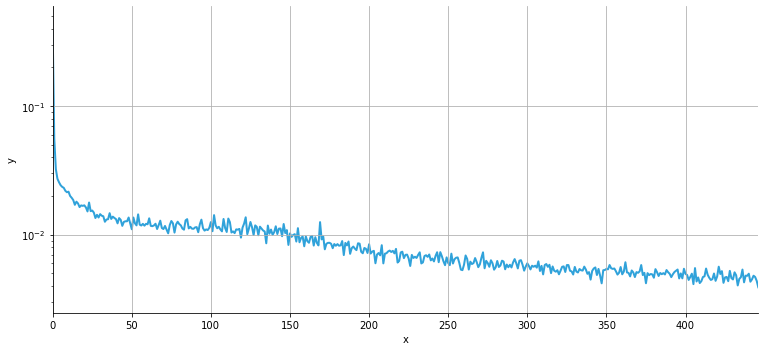

In [56]:
hv.Curve(history.history['loss']).opts(logy=True, show_grid=True, fig_size=350)

:Curve   [x]   (y)
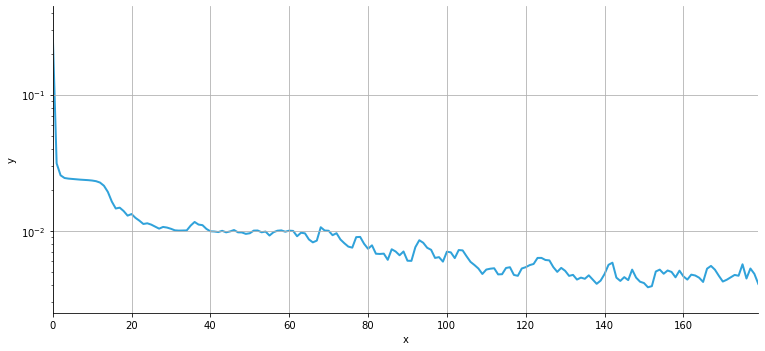

In [11]:
hv.Curve(history.history['loss']).opts(logy=True, show_grid=True, fig_size=350)

In [10]:
filepath = 'Models/Model1'
EikOP.save(filepath, save_optimizer=False, training_data=False)
EikOP = NES.NES_OP.load(filepath)

Loaded model from "Models/Model1"


### Neural network computation of Traveltimes, Gradients, Laplacian

In [12]:
%time T_pred = EikOP.Traveltime(Xr, batch_size=50000).reshape(nx, nz) # Traveltime

Wall time: 304 ms


## Finite Difference eikonal solver

In [13]:
%%time
# Traveltime using Factored fast marching of second order
d = [x[1]-x[0], z[1]-z[0]]
Tffm = ffm(V, ixs, d, 2) # factored solution (variations from homo) 
T = Tffm * distance(V.shape, d, ixs, indexing='ij') # solution

Wall time: 17 ms


In [14]:
# MAE of traveltimes
print(abs(T - T_pred).mean())
print(abs(T - T_pred).mean() / T.mean() * 100, ' %')

0.0011043558520313292
0.11291702343745  %


### Interpolation of fast marching 

In [15]:
%%time
# Initialization of "Linear interpolation" of Traveltimes, Gradients, and Laplacian
T_interp = NES.Interpolator(T, x, z, bounds_error=False, fill_value=None)

# function interpolating Traveltimes __call__ method of class T_interpolator)
T = T_interp(Xr) 

# function interpolating Gradients of Traveltimes 
G = T_interp.gradient(Xr, bounds_error=False, fill_value=None)

# function interpolating Laplacian of Traveltimes 
L = T_interp.laplacian(Xr, bounds_error=False, fill_value=None)

Wall time: 70 ms


# Visualization

#### Traveltimes maps and contours

In [16]:
vmap = hv.Image((x, z, V.T), label='V').opts(cmap='viridis', colorbar=True)
tmap = hv.Image((x, z, T.T), label='T_fmm').opts(cmap='kb')
tprmap = hv.Image((x, z, T_pred.T), label='T_pred').opts(cmap='isolum')

levels = np.linspace(T.min(), T.max(), 15)

tctr = hv.operation.contours(tmap, levels=levels).opts(cmap='kb', linestyle='solid', color_levels=1, linewidth=2)
tprctr = hv.operation.contours(tprmap, levels=levels).opts(cmap='gist_rainbow', linestyle='dashed', color_levels=1, linewidth=2)

:Overlay
   .Image.V         :Image   [x,y]   (z)
   .Contours.T_fmm  :Contours   [x,y]   (z)
   .Contours.T_pred :Contours   [x,y]   (z)
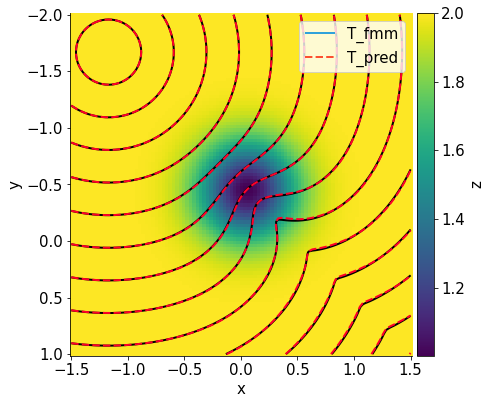

In [17]:
(vmap * tctr * tprctr).opts(hv.opts.Image(show_legend=False, fig_size=170, invert_yaxis=True, 
                                          fontsize=dict(labels=15, ticks=15, legend=15)))

#### Gradients

In [19]:
%time G_pred = EikOP.Gradient(Xr, batch_size=50000).reshape(nx, nz, -1) # Gradient

Wall time: 574 ms


In [20]:
dtxmap = hv.Image((x, z, G[...,0].T), label='dTx_fmm').opts(cmap='viridis', colorbar=True)
dtzmap = hv.Image((x, z, G[...,1].T), label='dTz_fmm').opts(cmap='viridis', colorbar=True)
dtmap = hv.Image((x, z, np.linalg.norm(G, axis=-1).T), label='|dT|_fmm').opts(cmap='viridis', colorbar=True)

dtxprmap = hv.Image((x, z, G_pred[...,0].T), label='dTx_pred').opts(cmap='viridis', colorbar=True)
dtzprmap = hv.Image((x, z, G_pred[...,1].T), label='dTz_pred').opts(cmap='viridis', colorbar=True)
dtprmap = hv.Image((x, z, np.linalg.norm(G_pred, axis=-1).T), label='|dT|_pred').opts(cmap='viridis', colorbar=True)

:Layout
   .Image.DTx_fmm                             :Image   [x,y]   (z)
   .Image.DTz_fmm                             :Image   [x,y]   (z)
   .Image.Vertical_line_dT_vertical_line_fmm  :Image   [x,y]   (z)
   .Image.DTx_pred                            :Image   [x,y]   (z)
   .Image.DTz_pred                            :Image   [x,y]   (z)
   .Image.Vertical_line_dT_vertical_line_pred :Image   [x,y]   (z)
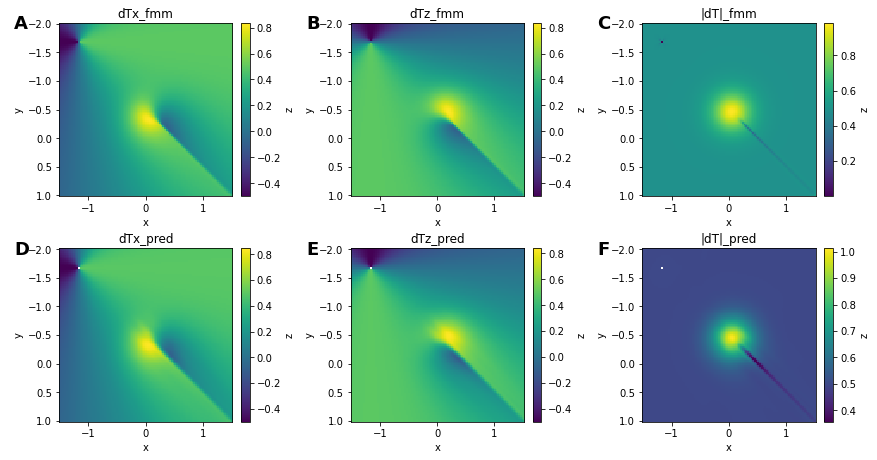

In [21]:
(dtxmap + dtzmap + dtmap + 
 dtxprmap + dtzprmap + dtprmap).cols(3).opts(hv.opts.Image(show_legend=False, fig_size=350, invert_yaxis=True))

#### Laplacians

In [28]:
%time L_pred = EikOP.Laplacian(Xr, batch_size=50000).reshape(nx, nz) # Laplacian

Wall time: 176 ms


In [23]:
lmap = hv.Image((x, z, L.T), label='L_fmm').opts(cmap='viridis', colorbar=True)
lprmap = hv.Image((x, z, L_pred.T), label='L_pred').opts(cmap='viridis', colorbar=True)

:Layout
   .Image.L_fmm  :Image   [x,y]   (z)
   .Image.L_pred :Image   [x,y]   (z)
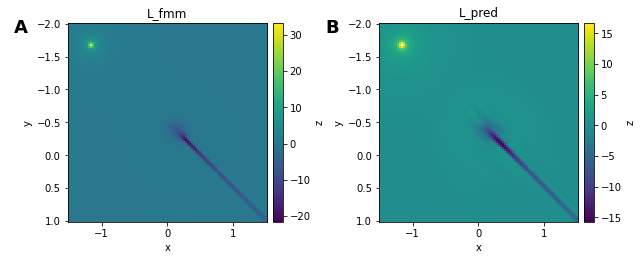

In [24]:
(lmap + lprmap).opts(hv.opts.Image(show_legend=False, fig_size=450, invert_yaxis=True, 
#                                    clim=(0, 6)
                                  ))

### Hessian

In [27]:
%time H_pred = EikOP.Hessian(Xr, batch_size=50000).reshape(nx, nz, -1) # Laplacian

Wall time: 171 ms


In [29]:
dtxxmap = hv.Image((x, z, H_pred[...,0].T), label='dTxx').opts(cmap='viridis', colorbar=True)
dtxzmap = hv.Image((x, z, H_pred[...,1].T), label='dTxz').opts(cmap='viridis', colorbar=True)
dtzzmap = hv.Image((x, z, H_pred[...,2].T), label='dTzz').opts(cmap='viridis', colorbar=True)

:Layout
   .Image.DTxx :Image   [x,y]   (z)
   .Image.DTxz :Image   [x,y]   (z)
   .Image.DTzz :Image   [x,y]   (z)
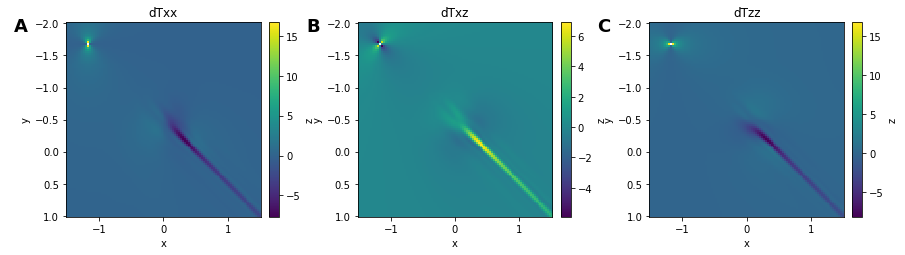

In [30]:
(dtxxmap + dtxzmap + dtzzmap).cols(3).opts(hv.opts.Image(show_legend=False, fig_size=350, invert_yaxis=True))